# Notebook 1

These two lines add the source folder to the path. These lines are specific to these notebooks and are not required in the example .py files.

In [2]:
# Importing the libraries -- You should NOT need to change this.
import sys,os
sys.path.append('source')
from skimage.io import imread
import matplotlib.pyplot as plt
from source.apd import *

def viewAcquisition(dataset,n=5,color=False):
    files = os.listdir(dataset.path)
    i = 0
    for file in files:
        if i>=n:
            break   
        if file.endswith('.tif'):
            img = imread(dataset.path+'/'+file)
            if color:
                keepDims = 3
            else:
                keepDims = 2
            print(f'Image has size {img.shape}')
            if len(img.shape)>keepDims:
                # permute N dimensional array to put the lst two dimesions first and then slice to the first two dimensions
                old  = [len(img.shape)-2,len(img.shape)-1] + [i for i in range(len(img.shape)-keepDims,len(img.shape)-2)]
                new =  range(keepDims)
                print(old,new)
                img = np.moveaxis(img,old,new)
                # slice N-dimensional array to the first two dimensions
                while len(img.shape)>keepDims:
                    if color:
                        img = img[:,:,:,0]                    
                    else:
                        img = img[:,:,0]
                print('Slicing to last two dimensions')
            if color:
                for i in range(img.shape[2]):
                    plt.figure()
                    plt.imshow(img[:,:,i])
                    plt.show()
            else:
                plt.figure()
                plt.imshow(img)
                plt.show()

## **Example 1.1**: Getting Started

Taking a singular image
Run MicroManager and open port 4845 in the Options setting.
Run an the acquisition of a single image at the origin [0,0] by taking a grid of images with no steps.

* **myConfig.cfg** : An empty configuration plain text file for demo use

* **rootDataFolder** : The location of the program home folder. Pointing this to a different locaiton will cause saving to that folder.

* **positions** : A list of (x,y) float or int pairs

AcqusitionPluginLibrary creates differnt types of acquistisions depending on the function used (Factory Design Pattern).

AcqusitionPluginLibrary.xySequence(posittions) takes in at least a list of (x,y) positions, and returns an AcquisitionPlugin which cotains a wad of settings to image a sequence of (x,y) positions.

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_14/
Image has size (512, 512)


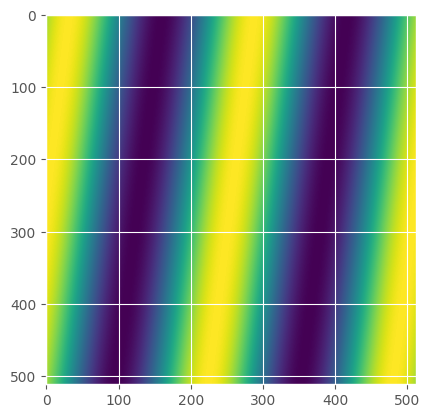

In [4]:
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0]] #a list of length 1 which will use the origin [0,0] only
acquisition = lib.xySequence(positions)
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.2: Add a Z-Stack 
Taking Stacks of images in the Z-Direction is often of interest. This can be performed by passing a the Z Range Keyword arguement which is a triplet of values given by : 
 
* **zRange** = [ **zStart** , **zEnd** , **zStepSize** ]
* **xStart** : The starting point of the Z-Stack
* **ZEnd** : The final point of the Z-Stack
* **ZStepStize** : The step size beween stacks.

A Z-Range of [-1.,1.,0.5] would return the individual Z positions [-1.0,-0.5,0.0,0.5,1.0].

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_15/
Image has size (5, 512, 512)
[1, 2] range(0, 2)
Slicing to last two dimensions


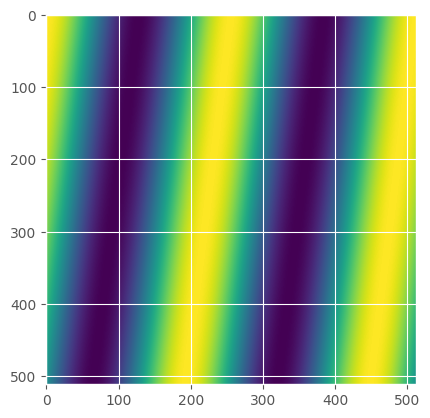

In [5]:
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0]]
zRange=[-1.,1.,.5]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.3: Add a Time Range 
Make A time Series of the Z Stacks by adding the time sereies keyword arguement

* **timeRange**=[numTimePoints,timeInterval_Seconds]



Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_16/
Image has size (3, 5, 512, 512)
[2, 3] range(0, 2)
Slicing to last two dimensions


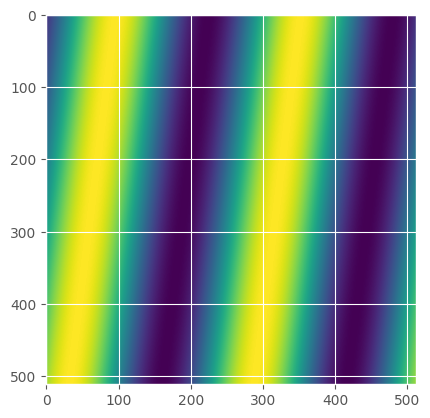

In [7]:
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='')
lib = AcquisitionPluginLibrary()
positions=[[0,0]]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5],timeRange=[3,3.5])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.4: Add another position to image

Image a nearby position by adding a position to the sequence by including annother (x,y) pair in the list of positions.


Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_17/
Image has size (3, 2, 5, 512, 512)
[3, 4] range(0, 2)
Slicing to last two dimensions


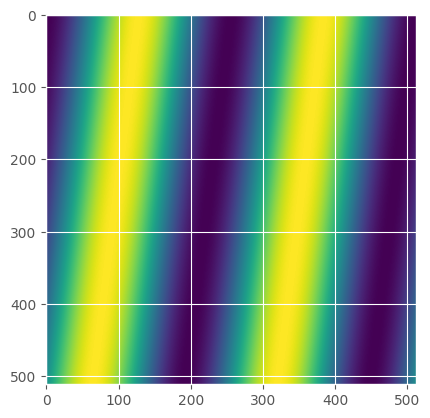

In [8]:
from source.apd import *
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[0,50]]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5],timeRange=[3,3.5])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset)

## Example 1.5: Image in multiple colors by adding an optional channelRange arguement
Multi-Color images can be taken by changing the ChannelRange of the system:

* **channelRange** = [ **ChannelName** , **ChannelNameItemsList** , **channelExposureTimeMS**]
    * channelName : a string of the type of 'state' to increment over
    * channelNameItemsList : list of items to change to
    * channelExposureTimeList_MS: list of channel exposure times in milliseconds which is equal in length to the items names.

Aquisition was completed and saved at /Users/munsky/Dropbox/My Mac (ETSs-MacBook-Pro.local)/Documents/GitHub/MicroscopyControlAndProcessing/data/users/default/acquisition/xySequence_18/
Image has size (3, 2, 5, 2, 512, 512)
[4, 5, 3] range(0, 3)
Slicing to last two dimensions


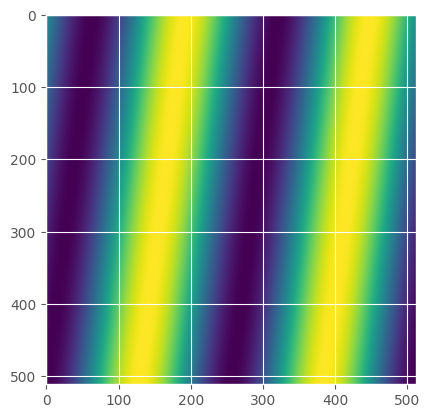

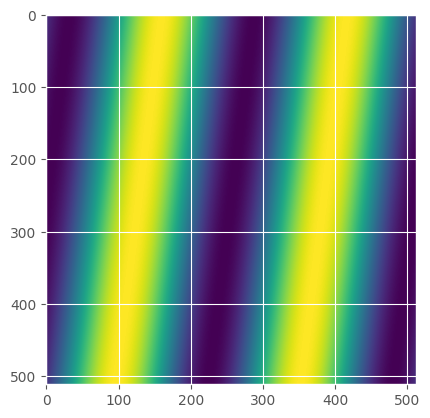

In [9]:
from source.apd import *
apdSystem = APDSystem(configFileName='myConfig.cfg', rootDataFolder='') #local
lib = AcquisitionPluginLibrary()
positions=[[0,0],[0,50]]
acquisition = lib.xySequence(positions,zRange=[-1.,1.,.5],timeRange=[3,3.5],channelRange=['Channel',['DAPI','Cy5'],[100,100]])
dataset=apdSystem.acquire(acquisition)
print(f'Aquisition was completed and saved at {dataset.path}')
viewAcquisition(dataset,color=True)